In [38]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    #注意 encoding='utf-8'
    fs = open(filename,encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

Yelp 点评数据集（第 6 轮）的统计信息
• 782 个商业分类。
• 整个数据集包含 1 569 264（≈ 160 万）条点评和 61 184 个商家。
• 就点评数量而言，“Restaurants”（990 627 条点评）和“Nightlife”（210 028 条点评）
是最普遍的分类。
• 没有商家既属于餐馆又属于夜生活场所，所以这两个点评分组中没有重叠

原始的点评数量横跨了若干个数量级，这对很多模型来说都是个问题。在线性模型中，
同一线性系数应该对所有可能的计数值起作用。过大的计数值对无监督学习方法也会造
成破坏，比如 k-均值聚类，它使用欧氏距离作为相似度函数来测量数据点之间的相似度

In [40]:
# 加载商家数据
biz_df = load_json_df('data/yelp/v6/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json')
biz_df

Text(0, 0.5, 'Occurence')

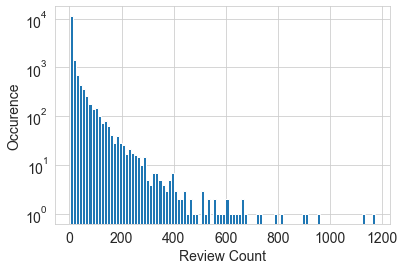

In [48]:
#绘制点评数量直方图
sns.set_style('whitegrid')
fig,ax=plt.subplots()
biz_df['review_count'].hist(ax=ax,bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count',fontsize=14)
ax.set_ylabel('Occurence',fontsize=14)

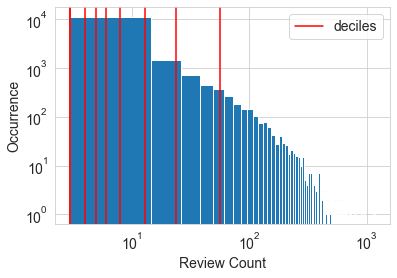

In [54]:
# 在直方图上画出十分位数
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
    ax.legend([handle], ['deciles'], fontsize=14)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.tick_params(labelsize=14)
    ax.set_xlabel('Review Count', fontsize=14)
    ax.set_ylabel('Occurrence', fontsize=14)

In [35]:
user_df = load_json_df('data/yelp/v6/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.json')

In [36]:
# read the first 10,000 lines of the reviews file (9,293,084 bytes) and load into dataframe
reviews_df = load_json_df('data/yelp/v6/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json', 9293084)
reviews_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38
...,...,...,...,...,...,...,...,...,...
11957,4TJFTyaY0yYhxFdAaZ5QNA,yWyEOsUhdo1fgici7u88Vw,kPfhSK0kcUmOTmC5DEjaDw,5.0,0,0,0,Saw this place on yelp with decent reviews. I...,2018-08-05 01:30:06
11958,KROir8I3DBZ6SoMlbbBPFQ,BeT7T1xT_WfGINi4RV_J9w,fpuThAK8Qw28DRqcL8zQqQ,5.0,1,0,0,Alexis is a true professional. She has a deep...,2014-10-11 19:39:56
11959,FVrOBnXUyMSf3Yk44p_7Uw,fRgpn-RIVOg694KBFWjxLg,c8M0snWaVUIw9ct_r9a7vw,1.0,4,0,0,My car was picked up from my home in Houston o...,2012-06-26 17:53:12
11960,zecH0ht0mtVirPJHDDdcJA,xRZ2DuebuqVYTmvdaFEzug,HhLVQg2DAmMll14mNDB4dg,4.0,1,0,0,"While my first experience was great, this one ...",2017-04-08 01:00:39


In [51]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

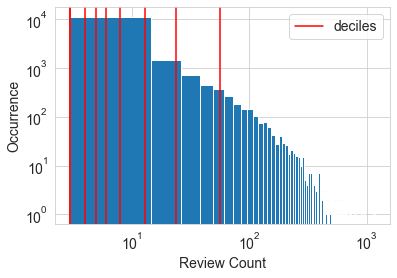